**Анализ датасета по продаже компьютерных игр.**

Цель: найти наиболее перспективный жанр игры для потенциальной разработки. 

Гипотеза: есть жанр игр (возможно в связке с платформой или что-то еще), который продается лучше.

Данный датасет содержит данные о продажах компьютерных игр за последние десятилетия. На основее этих  данных необюходимо найти наиболее перспективный жанр игр для потенциальной разработки. 

***Проверка качества данных.***

Сначала для дальнейшей работы необходимо импортировать необходимые библиотеки. При анализе будут использоваться использоваться следующие библиотеки: pandas для анализа данных, matplotlib и seaborn для визуализации данных.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Бибилотеки были успешно импортированы, а данные были загружены. Предобработка данных будет включать в себя поиск и работу с пропущенными значениями, дубликатами и т.д.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


В данном датафрейме существуют пропуски, но они составляют очень малую часть всего  массива данных, поэтому от них можно избавиться. Качества данных от их удаления не  пострадает. Типы данных в таблице в изменении не нуждаются. 

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
duplicateRows = df[df.duplicated ()]
duplicateRows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Проверка на наличие дубликатов также показала, преодобработка данных завершена и можно приступать к слудующему шагу. 

**Расчет основных статистических показателей**

В данном разделе будут рассчитаны основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение.

В данной таблице числовыми данными являются только данные о продажах. Год и ранг в данном случае можно отбросить. 

In [9]:
df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe ()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [11]:
df['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [12]:
df['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [13]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

Проведенный анализ показал, что  что наиболее прибыльм с точки зрения продаж копий игры являются регионы Северной Америки и Европы, при этом уровень продаж Японии и всех других стран сопоставим. Поэтому, основными рынками для потенциальной игры являются именно эти три региона с упором на США и Европу. 

Наиболее выпускаемыми жанрами игр являются экшены и спортивные симуляторы, наименее выпускаемыми - стратегии и головоломки. 

Самыми популярными платформами являются DS, PS2, PS3. Стоит учитывать, что с точки зрения развития игровой индустрии, представленные данные являются довольно устаревшими (они кончаются 2015 годом, и не учитывают такие платформы, как PS4, PS5, Nintendo Switch, консоли серии XBOX и т.д.).

Наибольшее количество игры было выпушено в концце нулевых годов - 2009 (1431 игра), 2008 (1428 игр) и 2010 (1257 игр). 

Лидерами по выпуску игр являются крупнейшие студии - EA, Activision, Namco Bandai Games, Ubisoft и Konami Digital Entertainment

***Визуализация данных***

В рамках данного пункта необходимо построить наиболее релевантные графики для анализа данных по компьютерным играм.  

Для начала стоит оценить динамику продаж игр по годам. Такой  анализ позволит оценить перспективы рынка и принять решение о выпуске/невыпуске игры. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

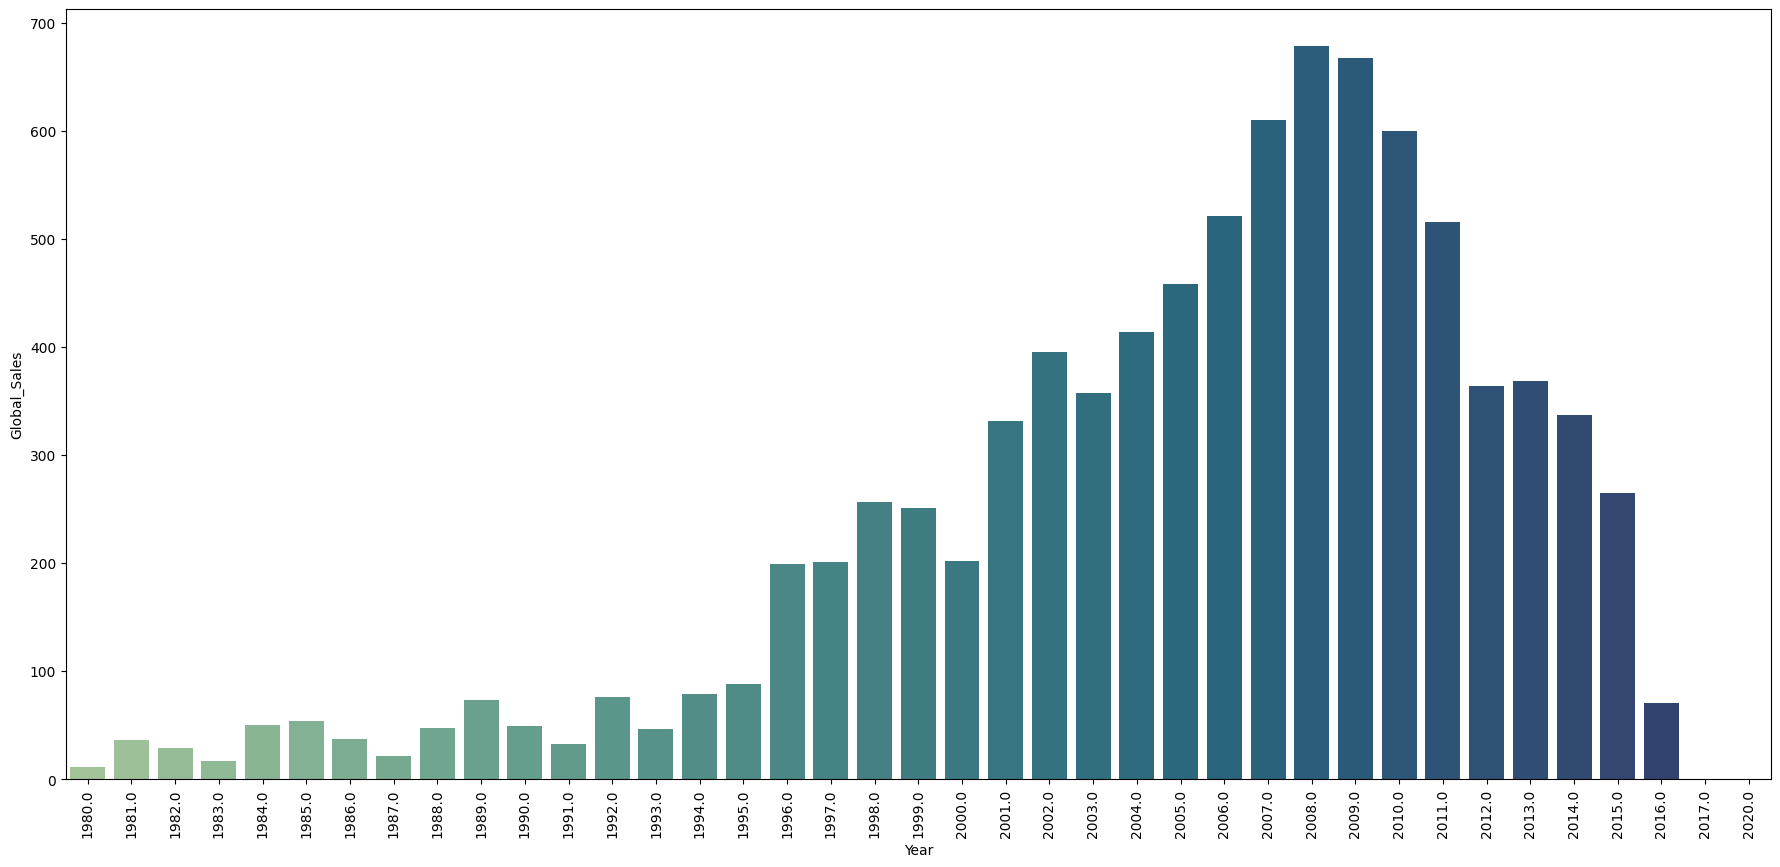

In [14]:
Sales=df.groupby(['Year'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= Sales.index, y= Sales.values, palette = 'crest')
plt.xticks(rotation=90)

С 1995 года игры начали продаваться суммарным тиражом более 100 миллионов копий и последующие 15 лет действительно считались настоящим расцветом игровой индустрии.

Стоит также рассмотреть наиболее популярные изданные игры по продажам в мире. 

Text(0.5, 1.0, 'Top Selling Games')

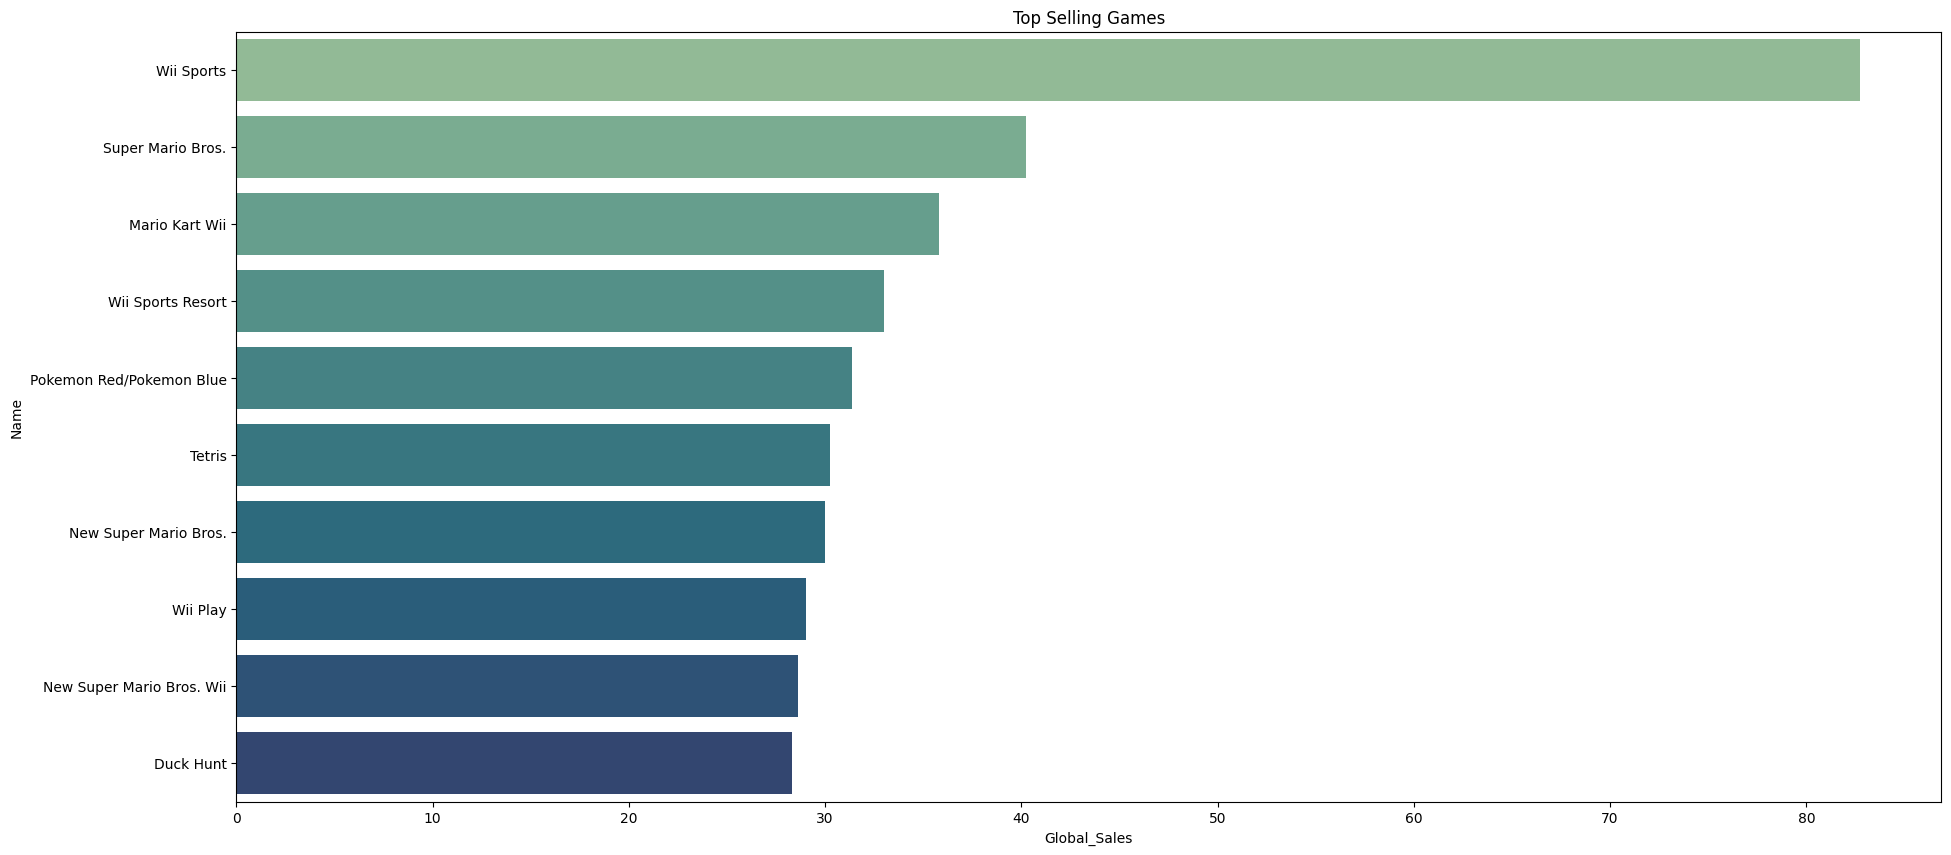

In [15]:
plt.figure(figsize=(22,10))
sns.barplot(y=df.Name.head(10),x=df.Global_Sales.head(10), palette = 'crest').set_title("Top Selling Games")


Наиболее продаваемыми играми за рассматриваемый период были игры либо по крупным франшизам, таким как Mario или Pokemon, так и спортивные и другие, всемирно известные игры (например, Тетрис).

Далеее стоит рассмотреть жанры, которые продавались лучше всех в мире. Для этого нужно сделать группировку по жанру и сумма продаж по каждому из них. Также стоит расположить  из в порядке убывания для лучшего понимания тенденции. 

In [16]:
genre_sales=df.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Genre Sales')

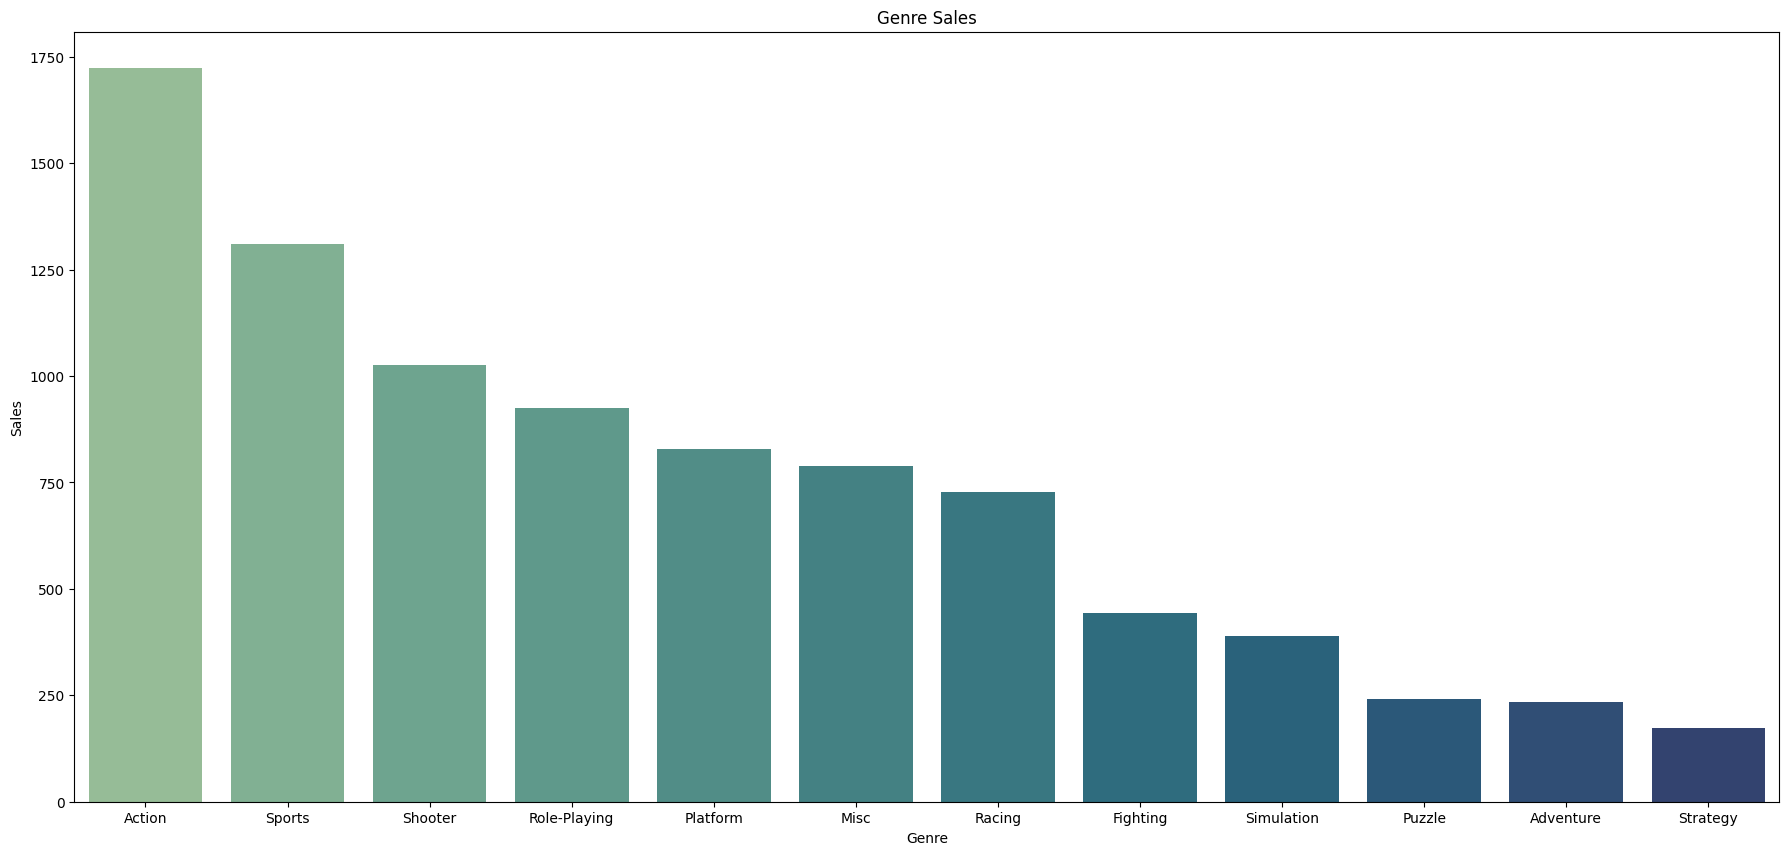

In [17]:
plt.figure(figsize=(22,10))
sns.barplot(x=genre_sales.index,y=genre_sales, palette = 'crest')
plt.ylabel("Sales")
plt.title("Genre Sales")

Больше всего продаются экшены, спортивные игры и шутеры, а также ролевые игры, платформеры и мулитижанровые игры. Наименее продаваемыми являются головоломки, приключения и стратегии. Однако это связано скорее в тем, что именно эти жанры являются наиболее популярными в разработке. 

Однако жанры игр имеют разную популярность в разных регионах мира и это также стоит учитывать при создании игр. Поэтому стоит провести анализ одновременно по жанрам и регионам мира.

<Axes: xlabel='Genre', ylabel='Other_Sales'>

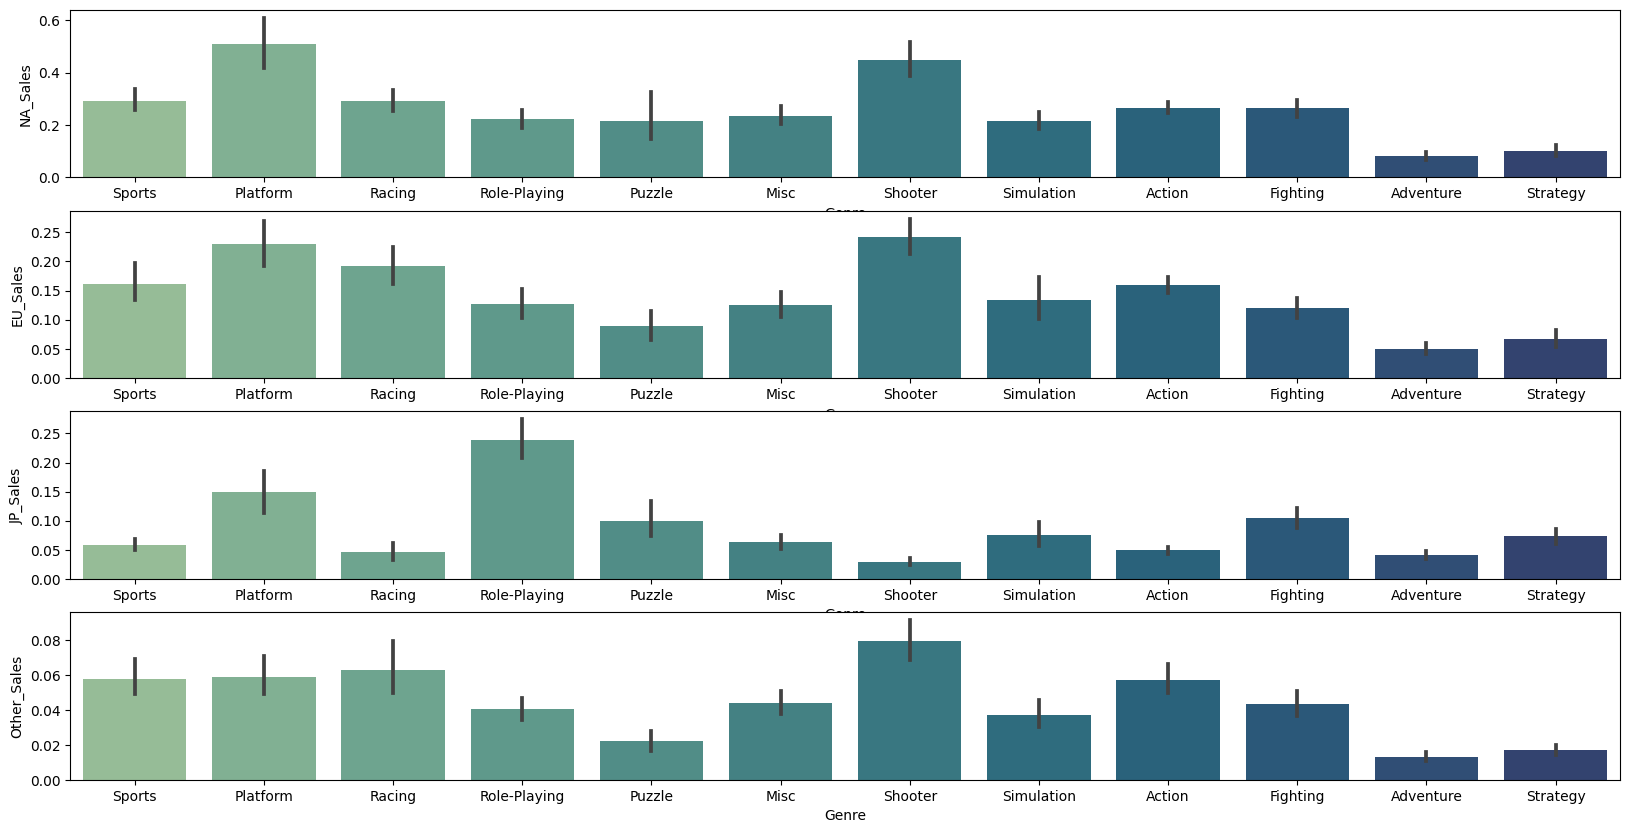

In [38]:
f, axes = plt.subplots(4, 1) 
plt.rcParams["figure.figsize"] = (20,5)
sns.barplot(x='Genre', y='NA_Sales', data=df, ax=axes[0], palette = 'crest')
sns.barplot(x='Genre', y='EU_Sales', data=df, ax=axes[1], palette = 'crest')
sns.barplot(x='Genre', y='JP_Sales', data=df, ax=axes[2], palette = 'crest')
sns.barplot(x='Genre', y='Other_Sales', data=df, ax=axes[3], palette = 'crest')

Анализ показывает, что шутеры являются популярными почти во всем мире, кроме Японии, в которой господствуют Ролевые игры. Япония наиболее сильно отличается от других регионов. В ней, например, не так популярны гонки, спортивные игры, экшены и т.д. При распространениит игры это будет являться важным фактором. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Microsoft Game Studios'),
  Text(2, 0, 'Take-Two Interactive'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Activision'),
  Text(5, 0, 'Ubisoft'),
  Text(6, 0, 'Bethesda Softworks'),
  Text(7, 0, 'Electronic Arts'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'SquareSoft'),
  Text(10, 0, 'Atari'),
  Text(11, 0, '505 Games'),
  Text(12, 0, 'Capcom'),
  Text(13, 0, 'GT Interactive'),
  Text(14, 0, 'Konami Digital Entertainment'),
  Text(15, 0, 'Sony Computer Entertainment Europe'),
  Text(16, 0, 'Square Enix'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Virgin Interactive'),
  Text(19, 0, 'Warner Bros. Interactive Entertainment'),
  Text(20, 0, 'Universal Interactive'),
  Text(21, 0, 'Eidos Interactive'),
  Text(22, 0, 'RedOctane')])

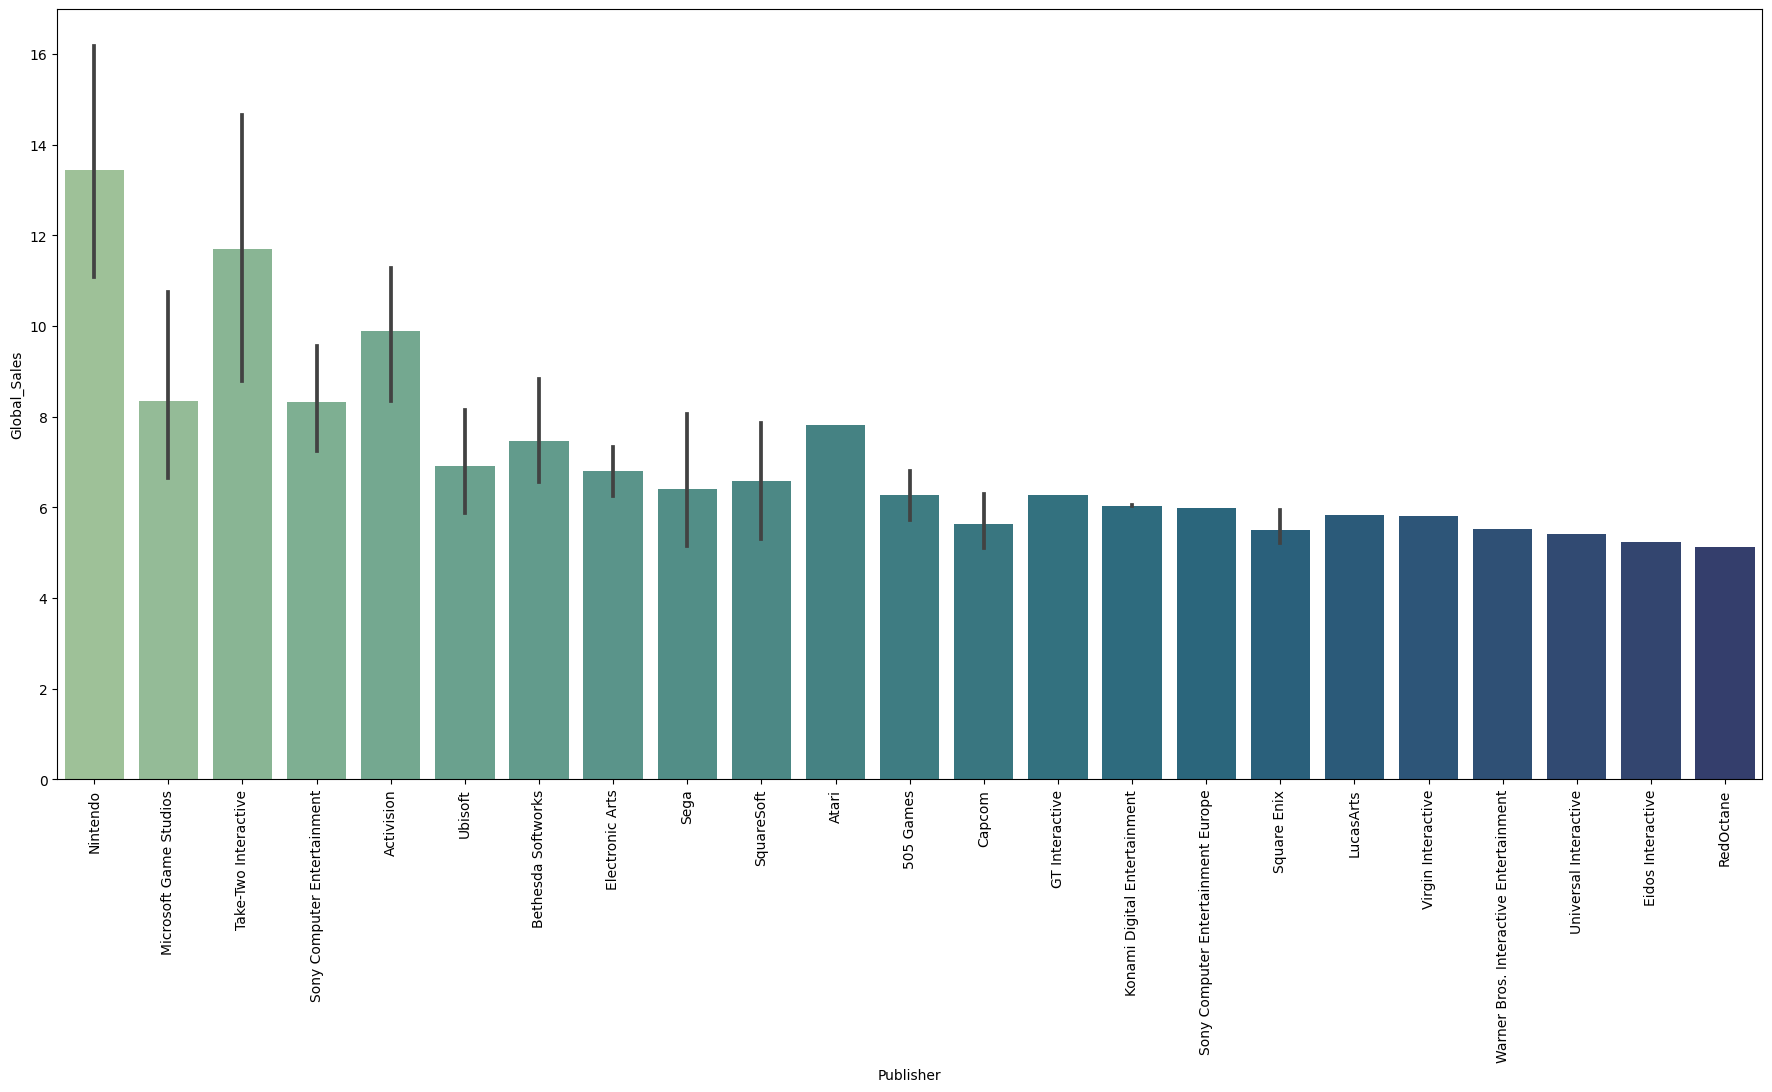

In [19]:
df12 = df.head(200)
plt.figure(figsize=(22,10))
sns.barplot(x='Publisher', y='Global_Sales', data=df12, palette = 'crest')
plt.xticks(rotation=90)

Больше всего в мире продается игр крупнейших компаний с большим количеством брендов и IP. Сюда входят компании Nintendo, Microsoft, Take-Two и т.д. У таких компаний есть большое количество ресурсов на выпуск и продвижение компьютерных игр, а также большое количество брендов в своем портфолио. 

<Axes: xlabel='Platform', ylabel='Global_Sales'>

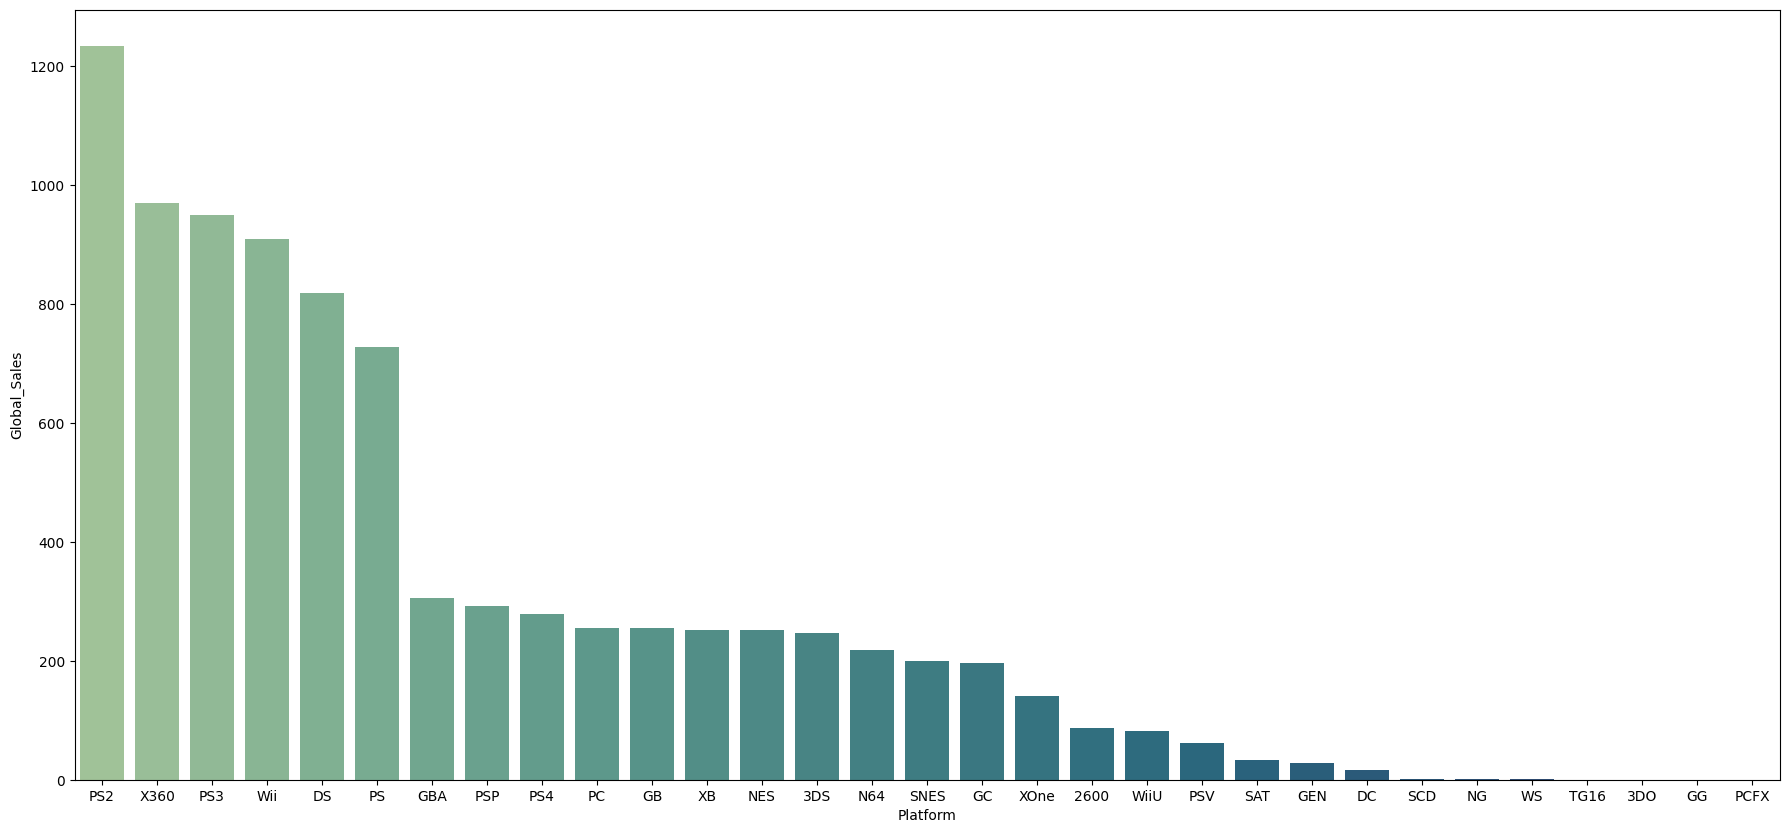

In [20]:
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= platform_sales.index, y= platform_sales.values, palette = 'crest')

Среди наиболее популярных платформ в значительной степени выделяются платформы от Sony,  Microsoft и Nintendo. Разработка своих платформ позволяет компаниям более тщательно подходить к анализу и внедрению внутренних инструментов, а также  распространять такие платформы по всему миру.

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

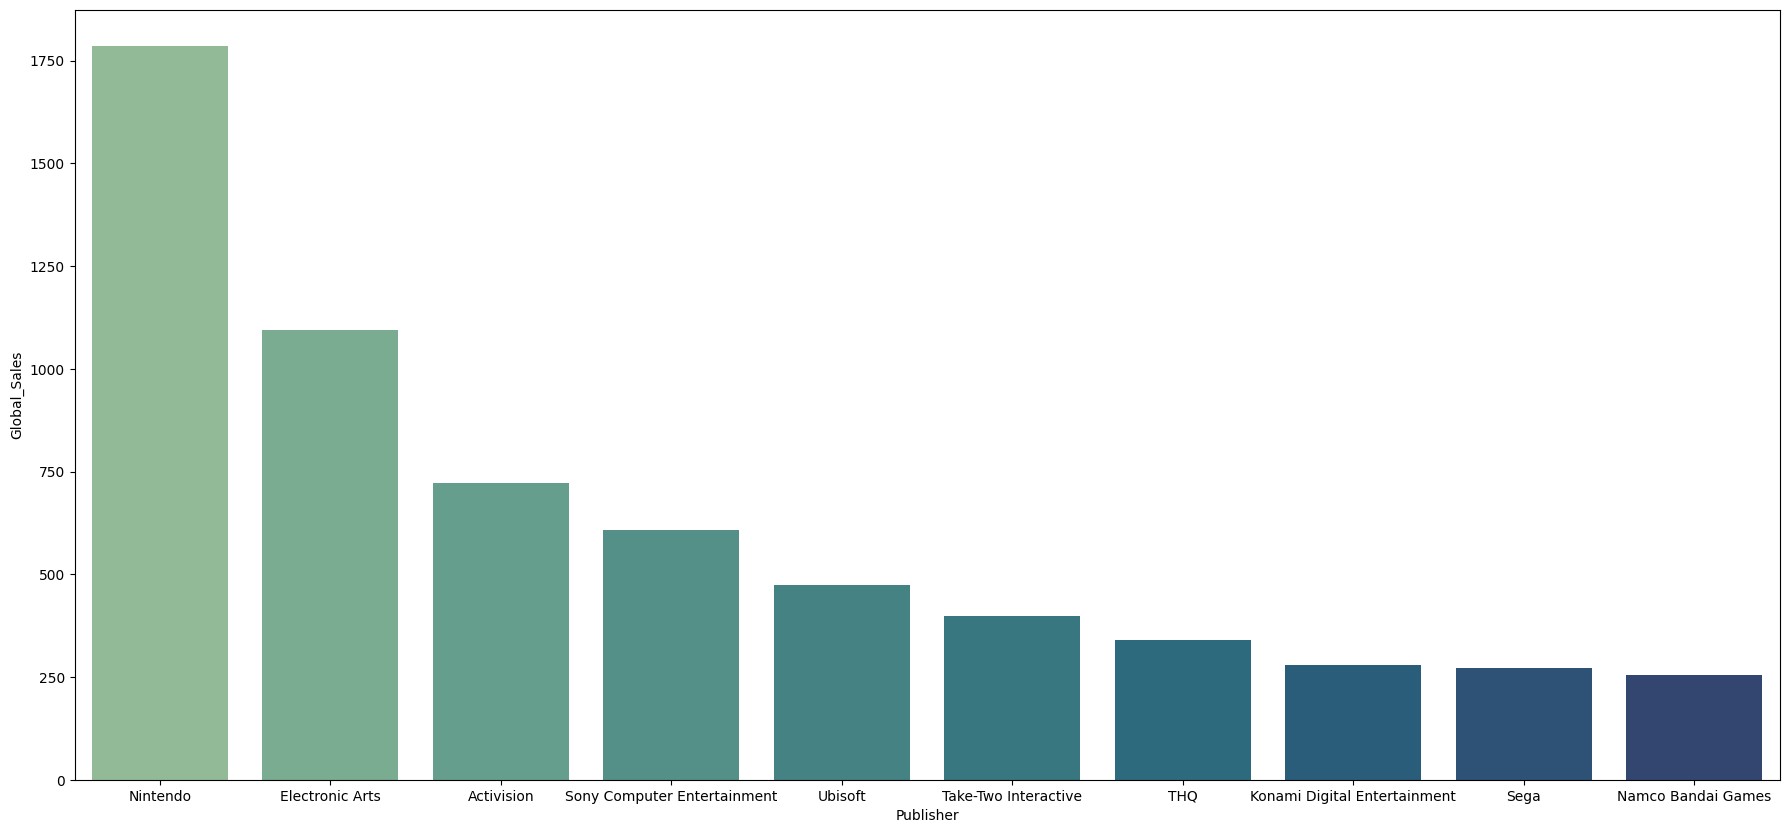

In [21]:
global_publisher=df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= global_publisher.index, y= global_publisher.values, palette = 'crest')

Лидером среди общемировых продаж является компания Nintendo. Благодаря популярность своих серий игр как в Азии, так и в ЕС и США, компания занимает лидирующее место среди всех других издателей. Electronic  Arts, Activision и Sony также находятся в лидерах. Несмотря на то, что игры таких компаний выходят значительно реже, чем игры компаний Nintendo, они ориентируются, прежде  всего, на качество своих продуктов, долгосрочную поддержку (создание игр-сервисов) и активный маркетинг на территории США и ЕС. 

***Составление матрицы корреляции***

Еще одним важным фактором для анализа рынка компьютерных игр является составление матрицы корреляции. В даннмо случае матрица корреляции будет включать в себя только показатели по году, рангу и различным продажам. Так как составление матрицы корреляции по жанрам (с использованием фиктивных переменных) не будет давать конкретной информации о той или иной взаимосвязи с показателями продаж. Аналогичный анализ и издателей компьютерных игр (еще одна проблема - большое количество издателей, что не позволит быстро провести такой анализ с точки зрения технических возможностей).

<Axes: >

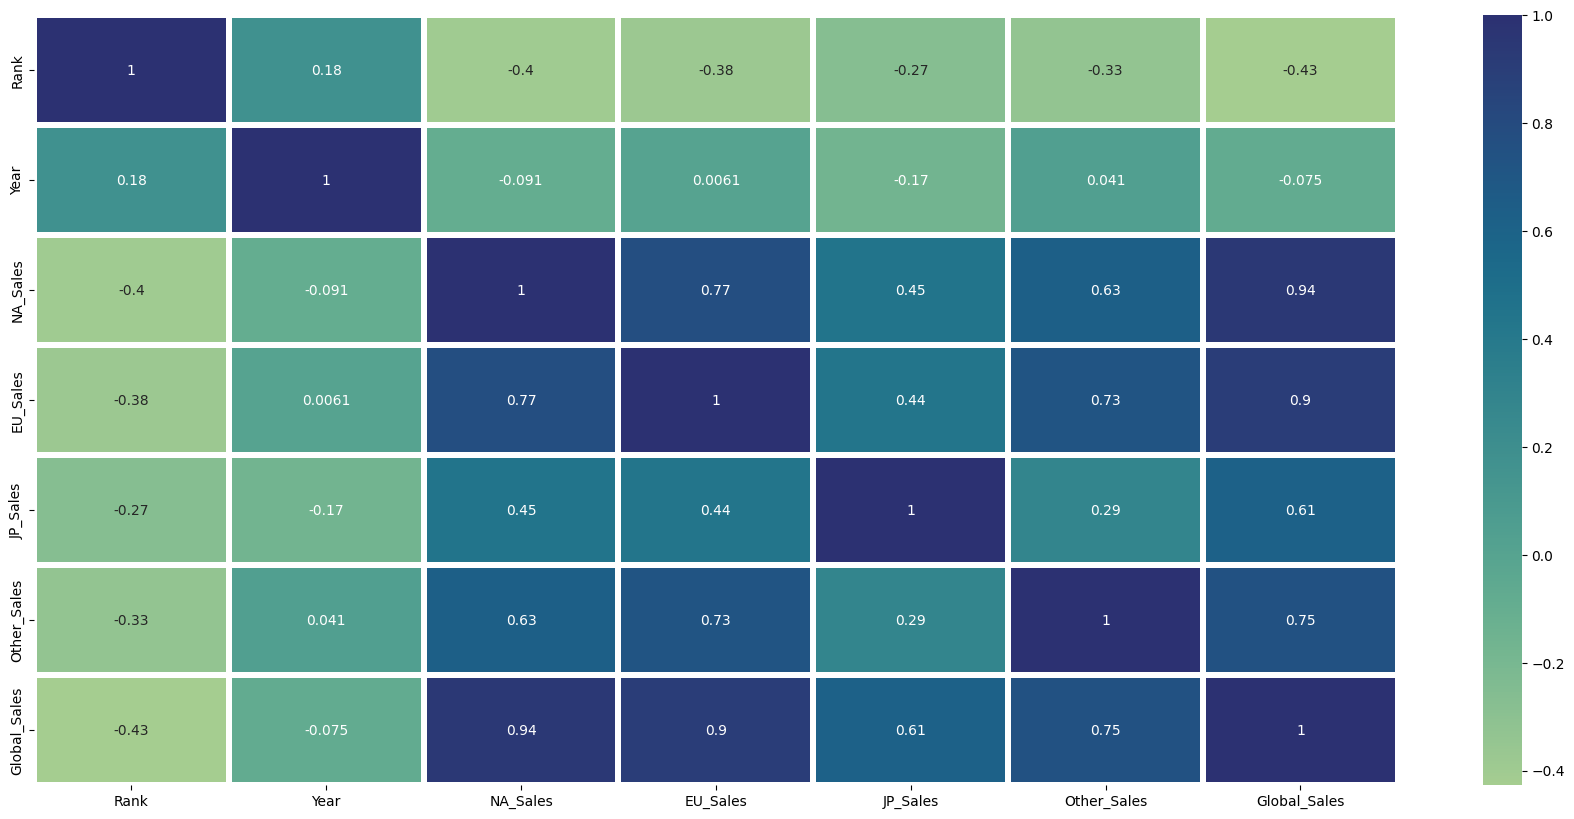

In [26]:
df_heat = df[["Rank","Year", "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
plt.figure(figsize=(22,10))
sns.heatmap(df_heat.corr(), cmap= "crest", annot=True, linewidth=3)

Матрица корреляции показывает, что продажи игр в Северной Америке и ЕС имеют крайне сильную взаимосвязь с общими  продажами игр. Коэффициент корреляции крайне близок к 1. В то же время, Продажи в других регионах имеют более тесную взаимосвязь с общими продажами, чем продажи в Японии. 

Стоит также отметить и сильную взаимосвязь между продажами в Северной Америке и Европе. Это  связано с тем, что эти рынки крайне емкие и многие игровые компании имеют свои отделения в Европе. А, например, рынок Великобритании во многих рейтингах является основным рынком для анализа популярности той или иной игры. 

В целом, анализ показывает, что продажи компьютерных игр по регионам крайне взаимосвязаны между собой. Успех игры на рынке США может повлечь за собой увеличение продаж в других регионах мира, а компании нацелены на реализацию своей собственной в наиболее  платежеспособных регионах мира. 

***Выводы***

Проведенной анализ данных по продажам компьютерных игр позволил выделить несколько важных тенденций современного игрового рынка. 

1. Больше всего выпускаемых игр реализуется на рынках Северной Америки (в основном, США) и Европы. 
2. Уровень продаж в Японии и других странах региона сопоставим между собой. 
3. Наиболее выпускаемыми жанрами игр являются экшены и спортивные игры, наименее выпускаемыми - стратегии и головоломки. 
4. Самая популярная игра - Wii Sports.  
5. В лидерах по продажам преобладают франшизы Mario и Pokemon.
6. Самая популярная платформа - PS2.
7. Среди наиболее популярных платформ в значительной степени выделяются платформы от Sony, Microsoft и Nintendo.
8. Больше всего продаются экшены, спортивные игры и шутеры, а также ролевые игры, платформеры и мулитижанровые игры. Наименее продаваемыми являются головоломки, приключения и стратегии.
9. Наибольшее количество игры было выпушено в конце нулевых годов - 2009 (1431 игра), 2008 (1428 игр) и 2010 (1257 игр).
10. Япония в заничтельной степени отличается в разбивке по популярным жанрам  игр. 
11. Лидером среди общемировых продаж является компания Nintendo. Electronic  Arts, Activision и Sony также находятся в лидерах. 

Однако, стоит учесть, что представленный датасет в большей степени  представляет собой достаточно устаревшие данные. В нем  не учитываются современные игры, выпущенные после 2016 года, не учитывыаются более современные платформы и консоли и  т.д. Поэтому в полной мере он не может отражать достоверную информацию о развитии современной игровой индустрии. 

В то же время, какие-то конкретные выводы о создании игр определенного жанра не позволяют сделать вывод о том, что игра будет успешной или нет. Успех игры определяется не жанром, а наполнением игры, ее графикой, механиками, сюжетом,  маркетингом и т.д. Поэтому можно привести только общие выводы о создании игр. **В целом такие данные можно будет использовать для анализа популярных жанров в разных регионах мира, для оценки рынка  компьютерных игр и выделения крупнейших игроков на нем, а  таккже проводить анализ наиболее популярных платформ и жанров.**

Таким образом, вся приведенная информация позволяет сделать следующие общие выводы об успешной игре. 

**Успешная игра - игра в жанре экшен, выпущенная для домашних консолей Play Station и XBOX, с элеимтами РПГ игр, выпущенная для рынка США и Европы**

Проведенный анализ показал, что В что наиболее прибыльм с точки зрения продаж копий игры является регион Северной Америки и Европы, при этом уровень продаж Японии и всех других стран сопоставим. Поэтому, основными рынками для потенциальной игры являются именно эти три региона с упором на США и Европу. 

Наиболее выпускаемыми жанрами игр являются экшены и спортивные симуляторы, наименее выпускаемыми - стратегии и головоломки. 

Самыми популярными платформами являются DS, PS2, PS3. Стоит учитывать, что с точки зрения развития игровой индустрии, представленные данные являбтся довольно устаревшими (они кончаются 2015 годом, и не учитывают такие платформы, как PS4, PS5, Nintendo Switch, консоли серии XBOX и т.д.).

Наибольшее количество игры было выпушено в конце нулевых годов - 2009 (1431 игра), 2008 (1428 игр) и 2010 (1257 игр). 

Лидерами по выпуску игр являются крупнейшие студии - EA, Activision, Namco Bandai Games, Ubisoft и Konami Digital Entertainment